In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pythainlp.tag import pos_tag

In [48]:
a = ['ฉัน','กิน','ข้าว', 'ปลา', 'อาหาร']
pos_tag(a,engine='unigram')

[('ฉัน', 'PPRS'),
 ('กิน', 'VACT'),
 ('ข้าว', 'NCMN'),
 ('ปลา', 'NCMN'),
 ('อาหาร', 'NCMN')]

In [31]:
cnt_all = 0
cnt_ne_sample = 0
dictionary = {}
with open('../fasttext.th.vec', 'r', encoding='utf8') as f:
    for i in f:
        tmp = i.split()
        if len(tmp) == 301:
            dictionary[tmp[0]] = np.array([float(w) for w in tmp[1:]])

oov_list = []
length = []
cnt_ne = []
indataset = []
with open('../clean169_no_stopwords.txt', 'r', encoding='utf8') as f1:
    with open('../label169_no_stopwords.txt', 'r', encoding='utf8') as f2:
        with open('../clean169_no_stopwords_NE.txt', 'w', encoding='utf8') as o1:
            with open('../lable169_no_stopwords_NE.txt', 'w', encoding='utf8') as o2:
                with open('../clean169_no_stopwords_not_NE.txt', 'w', encoding='utf8') as o3:
                    with open('../lable169_no_stopwords_not_NE.txt', 'w', encoding='utf8') as o4:
                        for ind, line in enumerate(f1):
                            if ind%4000==0:
                                print(ind)
                            line1 = line.strip()
                            line2 = f2.readline().strip()
                            cnt_all += 1
                            cnt_oov = 0
                            if '1' in line2.split('|'):
                                tmp_cnt_ne = 0
                                for i in line2.split('|'):
                                    if i.strip() == '1':
                                        tmp_cnt_ne +=1
                                cnt_ne.append(tmp_cnt_ne)
                                cnt_ne_sample += 1
                                o1.write(line1 + '\n')
                                o2.write(line2 + '\n')
                                indataset.append(0)
                            else:
                                o3.write(line1 + '\n')
                                o4.write(line2 + '\n')
                                indataset.append(1)
                            for word in line1.split('|'):
                                if word not in dictionary:
                                    cnt_oov += 1
                            oov_list.append(cnt_oov)
                            length.append(len(line1.split('|')))

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000
52000
56000
60000
64000
68000
72000
76000
80000
84000
88000
92000
96000
100000
104000
108000
112000
116000
120000
124000
128000
132000
136000
140000
144000
148000
152000
156000
160000
164000
168000
172000
176000
180000
184000
188000
192000
196000
200000
204000
208000
212000
216000
220000
224000
228000
232000
236000
240000
244000
248000
252000
256000
260000
264000
268000
272000
276000
280000
284000


In [39]:
print(cnt_ne_sample)
print(cnt_all)

130714
285268


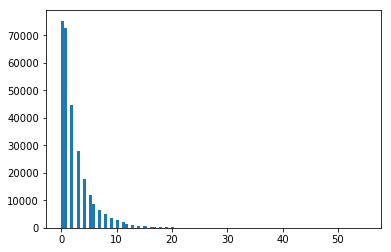

In [32]:
plt.hist(oov_list,100)
plt.show()
#length = []
#indataset = []

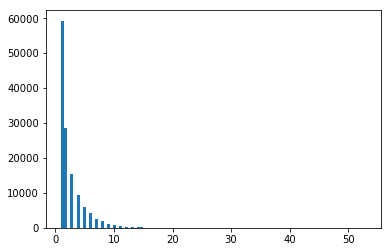

In [33]:
plt.hist(cnt_ne,100)
plt.show()

In [34]:
length_ne = [length[i] for i in range(len(length)) if indataset[i] == 0]

In [35]:
len(length_ne)

130714

In [36]:
len(cnt_ne)

130714

In [37]:
percent_ne = [length_ne[i]/cnt_ne[i] for i in range(len(cnt_ne))]

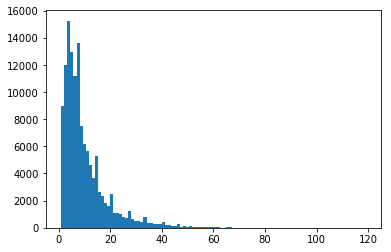

In [38]:
plt.hist(percent_ne,100)
plt.show()